dim (3, 1281, 721)


TypeError: function takes exactly 2 arguments (3 given)

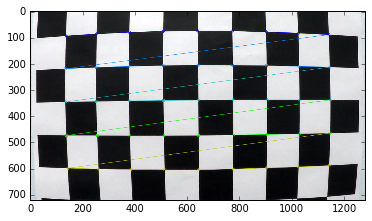

In [19]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

nx = 9 #The number of inside corners in x
ny = 5 #The number of inside corners in y

def get_corners(fnm, nx, ny, criteria):
    '''
    us cv2 to find the corners of chess board pattern
    '''
    img = cv2.imread(fname)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    
    if ret:
        corners = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
    
    return ret, corners

def display_corners(fnm, nx, ny, corners):
    img = cv2.imread(fname)
    
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, True)

    plt.imshow(img)

    
def calib(image_path, nx, ny):
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    
    # Make a list of calibration images
    cal_files = glob.glob(image_path)
    
    img = cv2.imread(cal_files[0])
    
    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

    imgpoints =[]
    objpoints = []

    for fname in cal_files:
        ret, corners = get_corners(fname, nx, ny, criteria)
        if ret:
            objpoints.append(objp)
            imgpoints.append(corners)
            
    display_corners(cal_files[0], nx, ny, imgpoints[0])
    
    dim = img.shape[::-1]
    
    print('dim', dim)
    
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, dim, None, None)
    
    print('ret', ret)
    return mtx

mtx = calib('camera_cal/*.jpg', nx, ny)


In [20]:
print(cv2.__version__)

3.2.0


In [ ]:
# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    h,  w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)